# Regression vs. Classification?

In the previous sections, we restricted our examples to data that would be appropriate for linear regression models. That is, our labels were real-valued; a value of `4` was more than `3.3` and less than `4.5`. If our model made a prediction of `3.9`, we knew it was a better prediction that if it had predicted `2.9`. When labels are real-valued and ordered like this, the problem is known as a **regression** problem.  
  
The other type of problem is **classification**, where we are trying to assign a sample to a particular group (i.e., classify it). In medical applications, you may want your model to produce a diagnosis or classify a tissue type. A **classifier** is a model that produces a categorical label for a input samples. A variable whose values corresponds to different classes or categories is a **categorical** variable.

# Classifiers
Let's create and train a classifier. We'll use a relatively-simple classifier that has an unfortunate name: `LogisticRegression`. Despite its name, logistic regression is a classifier that returns confidence estimates for each class.  

As with the regression example, `sklearn` provides toy datasets for classification problems. We'll use the Iris dataset, which is a dataset that uses features of the flower (e.g. sepal length, width) to predict which kind of Iris it is.  
  
In the following exercise, the following:  
1) Load the iris dataset  
2) Initialize a logistic regression classifier (AKA "logit").  
3) Perform 5-fold cross-validation  
4) Print the mean performance across the folds  
5) Plot the distribution  

iris data shape: (150, 4)
classes: [0 1 2]
[0.94444444 0.94444444 0.88888889 1.         0.94444444]
0.9444444444444444


<BarContainer object of 5 artists>

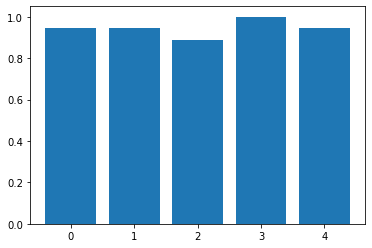

In [21]:
# Import the relevant modules
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Load the dataset
#help(sklearn.datasets.load_iris)
iris_data, iris_label = sklearn.datasets.load_iris(return_X_y=True)

# Examine our data
print('iris data shape: ' + str(iris_data.shape))
print('classes: ' + str(np.unique(iris_label)))

# Split into test-train
iris_data_train, iris_data_test, iris_label_train, iris_label_test = train_test_split(iris_data, iris_label, train_size=0.6)

# Initialize logit
logit = LogisticRegression(solver='liblinear')
score_list = cross_val_score(logit, iris_data_train, iris_label_train)

print(score_list)
print(np.mean(score_list))
plt.bar(np.arange(5), score_list)

1) What 'score' is being plotted? Is the plot informative?  
  - We need to check the model's documentation to see what score is being evaluated when `mdl.score` is called. The plot is _sort of_ informative; it tells us that we're generally doing well, but doesn't tell us much about where the errors are coming from. Further metrics like "mean accuracy" can be misleading, particularly in medical contexts.
  
2) Are the classes equally-difficult to predict? Are some harder to distinguish than others?  
  - This is not something we can assess using that plot.  
  - One easy tool for visualizing classification problems is the _confusion matrix_.  
  
For a problem with C classes, a _confusion matrix_ is a C-by-C matrix that functions like a bar plot. For each sample, it looks at the point (prediction, label) and adds it to that bin in the matrix. The full matrix is created by summing all available samples. Correct predictions are along the diagonal (prediction == label), and you can easily identify which classes are leading to more errors.

Using a logistic regression classifier, plot the confusion matrix the data we generated above.

Steps:
1) Look at the confusion matrix documentation. What arguments are needed?  
2) Create a LogisticRegression model.  
3) Fit the model to the training data.  
4) Get the model predictions using `mdl.predict(data)`  
5) Plot the confusion matrix. You can use either plt.imshow(conf) to plot the matrix, or use the function `sklearn.metrics.plot_confusion_matrix`

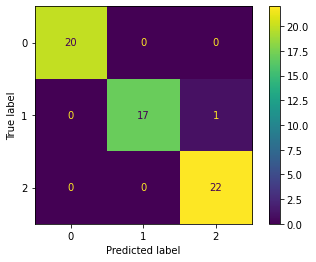

In [2]:
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Initialize and train the model
mdl = LogisticRegression(solver='liblinear')
mdl.fit(iris_data_train, iris_label_train)

# Or use the plotting function:
plot_confusion_matrix(mdl, iris_data_test, iris_label_test)

## Alternatively, if you want to do something with the confusion matrix values:
# Get predictions
pred = mdl.predict(iris_data_test)

# Generate confusion matrix and plot!
conf = confusion_matrix(y_pred=pred, y_true=iris_label_test)
plt.imshow(conf)

Here we see where the errors are coming from: samples that are labeled as '0' are correctly predicted. It looks like the last two categories are sometimes confused for one another.  
If we hadn't evaluated the test set, we could go back and modify our input or our model so that it considered those two categories more important. This might mean reweighting samples, or oversampling those categories.

# Binary Classification

In a lot of contexts, our problem is one of binary classification:  
- Is the patient sick?  
- Does this MRI have evidence of a tumour?  
  
When evaluating binary classifiers, you're likely to see some terminology pop up regularly. We'll go over some of these terms:  
  
- **Positive** and **Negative**  
Binary classifiers use 'negative' and 'positive' to differentiate between two classes.
  
- **True Positive** and **True Negative**.  
"True" refers to the correctness of the prediction relative to a known label. "True Positive" means that the model predicted class 1, and the true label was also class 1.  
  
- **False Positive** and **False Negative**  
"False" refers to the incorrectness of the prediction.  "False Positive" means that the model predicted class 1, but the true label was class 0.  
"False Negative" means that the model predicted class 0, but the true label was class 1.  
  
![Binary Confusion Matrix](img/binary_conf_matrix.png)  

- **Accuracy**  
Ratio between the correct predictions and all predictions:
\begin{equation}
{TP + TN} \over {TP + TN + FP + FN}
\end{equation}  
Accuracy reflects the fraction of correct predictions. "How often is our model correct?"  
  
- **Sensitivity**  
Ratio between True Positives and all positive labels (TP + FN):  
\begin{equation}
    {TP} \over {TP + FN}  
\end{equation}
Sensitivity reflects a model's ability to detect a positive case. "If the patient is sick, how well do we predict it?"  
  
- **Specificity**  
Ratio between True Negatives and all negative labels (TN + FP):  
\begin{equation}
    {TN} \over {TN + FP}
\end{equation}
Specificity reflects a model's ability to detect a negative case. "If the patient is healthy, how well do we predict it?"  
  
- **Precision**  
Ratio between True Positives and all _predicted_ positives:  
\begin{equation}
    {TP} \over {TP + FP}
\end{equation}  
Precision reflects how often a model is correct when it makes a positive prediction. "If the model predicts a patient is sick, what are the chances the patient is sick?"

As a model is trained, all of these metrics will initially increase as the general proportion of accurate predictions (TP and TN) will increase. After seeing sufficient data, there is usually a tradeoff between sensitivity and specificity.  
Increasing a model's affinity for making _positive_ predictions will improve its sensitivity; sensitivity is not penalized for creating false positives.  
Similarly, increasing a model's affinity for making _negative_ predictions will improve its specificity; specificity is not penalized for creating false negatives.  

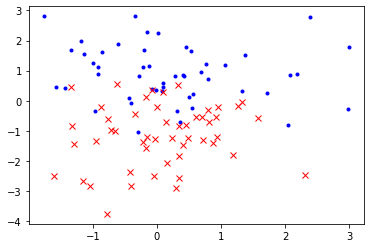

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# help(make_blobs)
x_data, y_label = make_blobs(n_samples=100, n_features=2, centers=[[0,1], [0,-1]])

plt.plot(x_data[y_label==0,0], x_data[y_label==0, 1], 'b.')
plt.plot(x_data[y_label==1,0], x_data[y_label==1, 1], 'rx')

## Binary Classifier Example 1

Looking at the previous plot, we see that our data overlaps but that it can be separated by a horizontal line. If we classify everything above the line as '0', and everything below the line as '1', we turn our horizontal line into a classifer.  
In this exercise, vary the position of the horizontal line from `-1` to `1`, classify the data into 0 or 1, and plot the following metrics vs. position:  
- Accuracy  
- Sensitivity  
- Specificity  

In [4]:
# Import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def sensitivity(y_true, y_pred):
    cls = classification_report(y_true, y_pred, output_dict=True)
    return cls['1']['recall']
def specificity(y_true, y_pred):
    cls = classification_report(y_true, y_pred, output_dict=True)
    return cls['0']['recall']

/home/lex/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


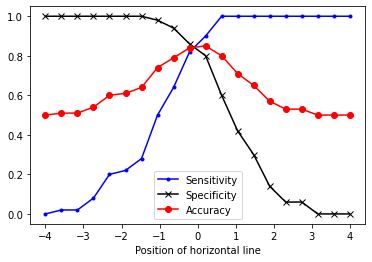

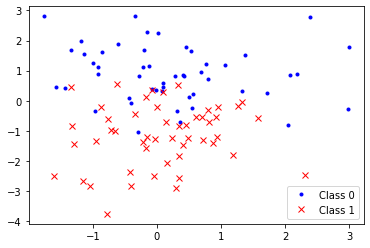

In [5]:
# vertical position of points are determined by x[:,1]
# For all samples with a position above p, set y_pred to 0
#  otherwise, set y_pred to 1
# vary p according to np.linspace(-1,1,20)

# x_data, y_label = make_blobs(n_samples=100, n_features=2, centers=[[0,1], [0,-1]])

###########
# Compute metrics and store them
y_pred = np.zeros(y_label.shape)

sens_list = []
spec_list = []
acc_list = []
p_range = np.linspace(-4,4,20)
for p in p_range:
    y_pred[x_data[:,1] > p] = 0
    y_pred[x_data[:,1] <= p] = 1
    sens = sensitivity(y_label, y_pred)
    spec = specificity(y_label, y_pred)
    acc = accuracy_score(y_label, y_pred)
    
    sens_list.append(sens)
    spec_list.append(spec)
    acc_list.append(acc)

###########    
    
    
plt.plot(p_range, sens_list, 'b.-')
plt.plot(p_range, spec_list, 'kx-')
plt.plot(p_range, acc_list, 'ro-')
plt.legend(['Sensitivity', 'Specificity', 'Accuracy'])
plt.xlabel('Position of horizontal line')

# Create point plot again for easy comparison
plt.figure()
plt.plot(x_data[y_label==0,0], x_data[y_label==0, 1], 'b.')
plt.plot(x_data[y_label==1,0], x_data[y_label==1, 1], 'rx')
plt.legend(['Class 0','Class 1'])

**Q. What is the best position for the dividing line?**  
_It depends_. 'Best' is always dependent on what you're doing. Suppose that this problem was screening for cancer; predicting a positive case would trigger additional (invasive) tests. Predicting a negative case would send the patient home.  
And if we're wrong? A False Positive would be detected by the additional tests. Early screenings tend to use indirect observation and err on the side of being too sensitive. A False Negative would mean telling a patient with cancer that they're fine and letting them go without treatment.  
  
Defining the "best" position for the dividing line isn't a question that can be answered without the context of the problem, since the cost of being wrong isn't established.  

## Binary Classification Example 2
The previous example showed how three metrics varied relative to one another. The data that was generated was a little unusual for medical contexts, since there were roughly the same number of samples for one class as another. In other words, we had a _balanced_ dataset.  
If you examine the metric plot you created, it's hard to see why 'accuracy' as a metric would make a lot of people wary of results. Qualitatively, it seemed to peak right where sensitivity and specificity are balanced. Let's look at what happens to the same metrics when we have an _unbalanced_ dataset.

/home/lex/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


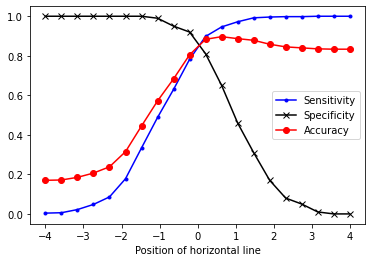

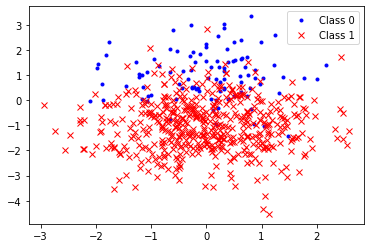

In [25]:
#
n_samples_0 = 100  # Samples for class 0
n_samples_1 = 500  # Samples for class 1

# Create our blobs
x_data_0, y_label_0 = make_blobs(n_samples=n_samples_0, n_features=2, centers=[[0,1]])
x_data_1, y_label_1 = make_blobs(n_samples=n_samples_1, n_features=2, centers=[[0,-1]])

# Put our data in single variable
x_data = np.zeros((n_samples_0 + n_samples_1, 2))
x_data[:n_samples_0, :] = x_data_0
x_data[n_samples_0:, :] = x_data_1

# Put our labels in single variabls
y_label = np.zeros((n_samples_0 + n_samples_1,), dtype=np.int64)
y_label[:n_samples_0] = 0
y_label[n_samples_0:] = 1
#

#######
# Put your metric code from above here if you want a direct comparison
y_pred = np.zeros(y_label.shape)

sens_list = []
spec_list = []
acc_list = []
p_range = np.linspace(4,-4,20)
for p in p_range:
    y_pred[x_data[:,1] > p] = 0
    y_pred[x_data[:,1] <= p] = 1
    sens = sensitivity(y_label, y_pred)
    spec = specificity(y_label, y_pred)
    acc = accuracy_score(y_label, y_pred)
    
    sens_list.append(sens)
    spec_list.append(spec)
    acc_list.append(acc)
########


plt.plot(p_range, sens_list, 'b.-')
plt.plot(p_range, spec_list, 'kx-')
plt.plot(p_range, acc_list, 'ro-')
plt.legend(['Sensitivity', 'Specificity', 'Accuracy'])
plt.xlabel('Position of horizontal line')

# Create point plot again for easy comparison
plt.figure()
plt.plot(x_data[y_label==0,0], x_data[y_label==0, 1], 'b.')
plt.plot(x_data[y_label==1,0], x_data[y_label==1, 1], 'rx')
plt.legend(['Class 0','Class 1'])

Imbalanced sets are more common in medical contexts than balanced ones, and the explanation is intuitive. There are more people without a disease than those with it. Without examining the dataset, reporting a model's accuracy can be misleading.

## Binary Classification Example 3
One of the questions you may be asking yourself is, "If selecting the best model depends on the context, how can we compare models?"  
If we're proposing to use a model for a certain problem, we don't know whether other people would even agree with our metric. Having a False Negative might seem extremely bad from our point of view, but the Coalition of Evil Doctors might disagree.  
There are measures that help us work around that problem. The question of context boils down to asking, "When the truth is X, how often does my model predict it?" and then balancing between `X=0` and `X=1`. We can provide that answer as a plot, known as a receiver operating characteristic curve ("ROC curve").  
  
The ROC curve considers two metrics: the True Positive Rate (aka sensitivity), and the False Positive Rate (aka 1-specificity).  
In this exercise, do the following:  
1) Initialize a logistic regression classifier.  
2) Create two data blobs (balanced is fine). Visualize them.  
3) Train your classifier.  
4) Plot the ROC curve using `sklearn.metrics.plot_roc_curve`  

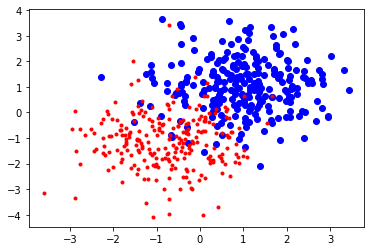

In [33]:
# Initialize
logit = LogisticRegression(solver='liblinear')

# Create blobs
x_data, y_labels = make_blobs(n_samples=500, n_features=2, centers=[[1,1],[-0.75,-1]])
x_data_train, x_data_test, y_label_train, y_label_test = train_test_split(x_data, y_labels, train_size=0.6)
# Visualize
plt.figure()
plt.plot(x_data[y_labels==0, 0], x_data[y_labels==0, 1], 'bo')
plt.plot(x_data[y_labels==1, 0], x_data[y_labels==1, 1], 'r.')

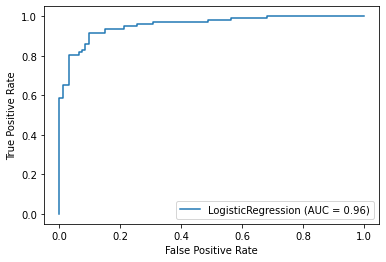

In [37]:
# Train classifier
logit.fit(x_data_train, y_label_train)

from sklearn.metrics import plot_roc_curve
plot_roc_curve(logit, x_data_test, y_label_test)